## Regresión logistica para predicciones bancarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../datasets/bank/bank.csv",sep=";")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [3]:
data.shape

(4119, 21)

In [4]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [5]:
data['y'] = (data["y"]=="yes").astype(int)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [6]:
data["education"].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [7]:
data["education"] = np.where(data["education"] =='basic.4y',"Basic", data["education"])
data["education"] = np.where(data["education"] =='basic.6y',"Basic", data["education"])
data["education"] = np.where(data["education"] =='basic.9y',"Basic", data["education"])
data["education"] = np.where(data["education"] =='high.school',"High School", data["education"])
data["education"] = np.where(data["education"] =='professional.course',"Professional Course", data["education"])
data["education"] = np.where(data["education"] =='university.degree',"University Degree", data["education"])
data["education"] = np.where(data["education"] =='illiterate',"Illiterate", data["education"])
data["education"] = np.where(data["education"] =='unknown',"Unknown", data["education"])


In [8]:
data["education"].unique()

array(['Basic', 'High School', 'University Degree', 'Professional Course',
       'Unknown', 'Illiterate'], dtype=object)

In [9]:
data["y"].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [10]:
data.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [11]:
data.groupby("education").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


In [12]:
%matplotlib inline

Text(0,0.5,'Frecuencia de compra del producto')

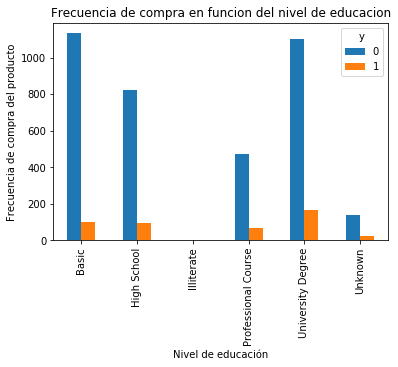

In [13]:
pd.crosstab(data.education, data.y).plot(kind="bar")
plt.title("Frecuencia de compra en funcion del nivel de educacion")
plt.xlabel("Nivel de educación")
plt.ylabel("Frecuencia de compra del producto")

Text(0,0.5,'Proporcion de clientes')

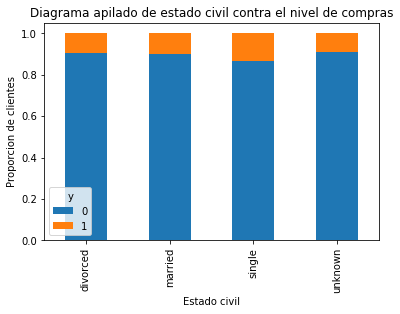

In [14]:
table = pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True)
plt.title("Diagrama apilado de estado civil contra el nivel de compras")
plt.xlabel("Estado civil")
plt.ylabel("Proporcion de clientes")

Text(0,0.5,'Frecuencua de compra del producto')

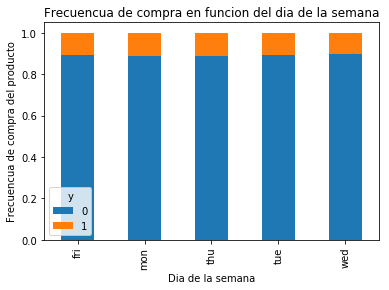

In [15]:
table = pd.crosstab(data.day_of_week, data.y)
table.div(table.sum(1).astype(int),axis=0).plot(kind="bar",stacked=True)
plt.title("Frecuencua de compra en funcion del dia de la semana")
plt.xlabel("Dia de la semana")
plt.ylabel("Frecuencua de compra del producto")

Text(0,0.5,'Frecuencua de compra del producto')

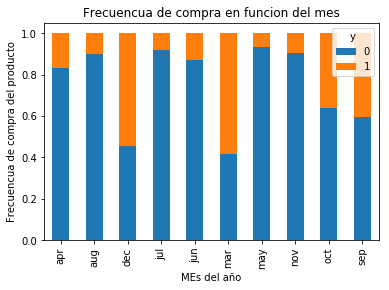

In [16]:
table = pd.crosstab(data.month, data.y)
table.div(table.sum(1).astype(int),axis=0).plot(kind="bar",stacked=True)
plt.title("Frecuencua de compra en funcion del mes")
plt.xlabel("MEs del año")
plt.ylabel("Frecuencua de compra del producto")

Text(0,0.5,'Frecuencua de compra del producto')

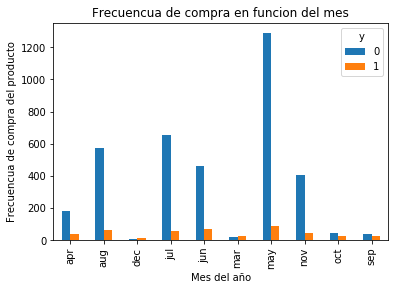

In [17]:
table = pd.crosstab(data.month, data.y).plot(kind="bar")
plt.title("Frecuencua de compra en funcion del mes")
plt.xlabel("Mes del año")
plt.ylabel("Frecuencua de compra del producto")

Text(0,0.5,'Clientes')

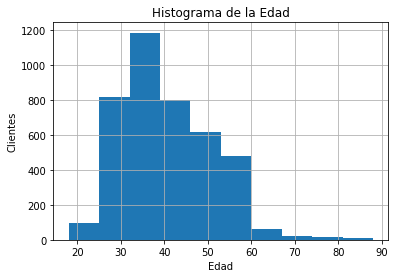

In [18]:
table = pd.crosstab(data.age, data.y)
data.age.hist()
plt.title("Histograma de la Edad")
plt.xlabel("Edad")
plt.ylabel("Clientes")

Text(0,0.5,'Frecuencua de compra del producto')

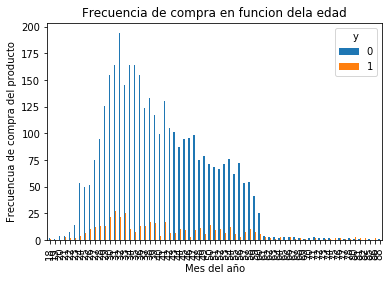

In [19]:
table = pd.crosstab(data.age, data.y).plot(kind="bar")
plt.title("Frecuencia de compra en funcion dela edad")
plt.xlabel("Mes del año")
plt.ylabel("Frecuencua de compra del producto")

Text(0.5,1,'Frecuencia de compra en funcion dela edad')

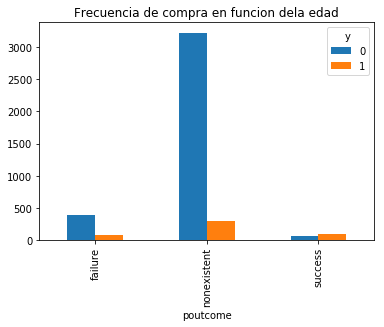

In [20]:
table = pd.crosstab(data.poutcome, data.y).plot(kind="bar")
plt.title("Frecuencia de compra en funcion dela edad")


### Conversion de las variables categoricas a dummies

In [21]:
categories = ["job","marital","education","housing","loan","contact","month","day_of_week", "poutcome"]

for category in categories :
    cat_list = "cat_"+category
    cat_dummies = pd.get_dummies(data[category], prefix =category)#cat_list
    data_new = data.join(cat_dummies)
    data = data_new

In [22]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,blue-collar,married,Basic,no,yes,no,cellular,may,fri,...,0,0,1,0,0,0,0,0,1,0
1,39,services,single,High School,no,no,no,telephone,may,fri,...,0,0,1,0,0,0,0,0,1,0
2,25,services,married,High School,no,yes,no,telephone,jun,wed,...,0,0,0,0,0,0,1,0,1,0
3,38,services,married,Basic,no,unknown,unknown,telephone,jun,fri,...,0,0,1,0,0,0,0,0,1,0
4,47,admin.,married,University Degree,no,yes,no,cellular,nov,mon,...,0,0,0,1,0,0,0,0,1,0


In [23]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_unknown', 'education_Basic',
       'education_High School', 'education_Illiterate',
       'education_Professional Course', 'education_University Degree',
       'education_Unknown', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may

In [24]:
data_vars = data.columns.values.tolist()
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_unknown', 'education_Basic',
       'education_High School', 'education_Illiterate',
       'education_Professional Course', 'education_University Degree',
       'education_Unknown', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may

In [30]:
to_keep = [v for v in data_vars if v not in categories]
bank_data = data[to_keep]
bank_data.columns.values

array(['age', 'default', 'duration', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management',
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_High School',
       'education_Illiterate', 'education_Professional Course',
       'education_University Degree', 'education_Unknown', 'housing_no',
       'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown',
       'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu'

In [32]:
data_vars = bank_data.columns.values.tolist()
to_keep = [v for v in data_vars if v not in ["default"]]
bank_data = bank_data[to_keep]
bank_data.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_High School',
       'education_Illiterate', 'education_Professional Course',
       'education_University Degree', 'education_Unknown', 'housing_no',
       'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown',
       'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'd

In [33]:
bank_data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,0,0,1,0,0,0,0,0,1,0
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,...,0,0,1,0,0,0,0,0,1,0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,...,0,0,0,0,0,0,1,0,1,0
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,...,0,0,1,0,0,0,0,0,1,0
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,...,0,0,0,1,0,0,0,0,1,0


In [34]:
bank_data_vars = bank_data.columns.values.tolist()
Y =  ['y']
X = [v for v in bank_data_vars if v not in Y ]

### Seleccion de rasgos para el modelo

es para decidir cuales de todas las variables son mas significativas para predecir el valor de salida del modelo

In [35]:
n = 12

In [36]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [37]:
lr = LogisticRegression()

In [38]:
rfe = RFE(lr,n)
rfe = rfe.fit(bank_data[X],bank_data[Y].values.ravel())

In [39]:
print(rfe.support_)

[False False False False  True False False False  True False False False
  True False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True  True  True  True  True False
  True False False False False False False  True False  True]


In [40]:
print(rfe.ranking_)

[34 41 18 42  1 14 27 25  1 38 22  3  1 35  2 36  1  5 30 33 12 45 19 40
 31 47 26 13 46 21 32  8 20  6 10 15  9 23 16  4 43 24  1  1  1  1  1 17
  1 44 37 28 39 29 11  1  7  1]


In [41]:
z = zip (bank_data_vars,rfe.support_,rfe.ranking_ )

In [42]:
list(z)

[('age', False, 34),
 ('duration', False, 41),
 ('campaign', False, 18),
 ('pdays', False, 42),
 ('previous', True, 1),
 ('emp.var.rate', False, 14),
 ('cons.price.idx', False, 27),
 ('cons.conf.idx', False, 25),
 ('euribor3m', True, 1),
 ('nr.employed', False, 38),
 ('y', False, 22),
 ('job_admin.', False, 3),
 ('job_blue-collar', True, 1),
 ('job_entrepreneur', False, 35),
 ('job_housemaid', False, 2),
 ('job_management', False, 36),
 ('job_retired', True, 1),
 ('job_self-employed', False, 5),
 ('job_services', False, 30),
 ('job_student', False, 33),
 ('job_technician', False, 12),
 ('job_unemployed', False, 45),
 ('job_unknown', False, 19),
 ('marital_divorced', False, 40),
 ('marital_married', False, 31),
 ('marital_single', False, 47),
 ('marital_unknown', False, 26),
 ('education_Basic', False, 13),
 ('education_High School', False, 46),
 ('education_Illiterate', False, 21),
 ('education_Professional Course', False, 32),
 ('education_University Degree', False, 8),
 ('education_U

In [43]:
cols = ["previous","euribor3m","job_blue-collar","job_retired","month_aug","month_dec","month_jul","month_jun","month_mar","month_nov","day_of_week_wed","poutcome_nonexistent"]

In [44]:
X = bank_data[cols]
Y = bank_data["y"]

### Implementación del modelo en python con statsmodels.api

In [45]:
import statsmodels.api as sm

In [46]:
logit_model = sm.Logit(Y,X)

In [47]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.291770
         Iterations 7


In [48]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Pseudo R-squared:  0.155     
Dependent Variable:   y                 AIC:               2427.6025 
Date:                 2020-05-09 09:50  BIC:               2503.4828 
No. Observations:     4119              Log-Likelihood:    -1201.8   
Df Model:             11                LL-Null:           -1422.9   
Df Residuals:         4107              LLR p-value:       6.4492e-88
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
previous             -0.1229   0.0700  -1.7545 0.0793 -0.2601  0.0144
euribor3m            -0.6049   0.0383 -15.7882 0.0000 -0.6800 -0.5298
job_blue-collar      -0.5032   0.1519  -3.3136 0.0009 -0.8009 -0.2056
job_retired           0.2235   0.2191   1.0205 0.3075 -0.2058  0.6529
month_aug             0.6048   0.1759   3.4374 0.0006  0.2600  0.9497
month_dec             1.1358   0.4493   2.5281 0.0115  0.2552  2.0163
month_jul             1.0327   0.1910   5.4071 0.0000  0.6584  1.4070
month_jun             1.0775   0.1752   6.1493 0.0000  0.7341  1.4210
month_mar             1.6448   0.3139   5.2407 0.0000  1.0297  2.2600
month_nov             0.3828   0.1950   1.9634 0.0496  0.0007  0.7649
day_of_week_wed      -0.0649   0.1391  -0.4665 0.6409 -0.3375  0.2077
poutcome_nonexistent -0.7753   0.1221  -6.3492 0.0000 -1.0147 -0.5360
=====================================================================

"""

**NOTA:** Mientras mas pequeño sea el P valor mas significativa es la variable, por lo tanto hay mas posibilidades de rechazara la hipotesis nula, por el contrario entre mas alto el P valor mas probabilidad de que No se pueda rechazar la hipotesis nula por lo tanto el modelo no servira

### --------------------------------------------
# skitlearn 
No calculalos  los P valores pero lleva acabo tareas mas completas mas complicadas y mas interesantes como podria ser
* la prediccion
* calcular diferentes rasgos
* funciones avanzadas que no trae statsmodels
### Este se puede usar para crear el modelo final y la prediccion con el valor que finalmente se utilizara en produccion

# statsmodels 
Calcula automaticamente los P valores
### Este metodo se puede utilizar para explorar y afinar el modelo 
### ---------------------------------------------

### Implementacion del modelo en Python con scikit-learn

In [49]:
from sklearn import linear_model

In [50]:
logit_model = linear_model.LogisticRegression()
logit_model.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [51]:
## Significa que es un modelo con mucha credibilidad
logit_model.score(X,Y)

0.8963340616654528

In [52]:
Y.mean()

0.10949259529011895

In [53]:
1-Y.mean()

0.8905074047098811

In [54]:
pd.DataFrame(list(zip(X.columns,np.transpose(logit_model.coef_))))

,0,1
0,previous,[0.5076571353702829]
1,euribor3m,[-0.546496133920961]
2,job_blue-collar,[-0.3591553622507818]
3,job_retired,[0.35603838876396016]
4,month_aug,[0.6253983085949565]
5,month_dec,[1.1822172985978154]
6,month_jul,[0.9622633626968825]
7,month_jun,[1.0543179248209773]
8,month_mar,[1.6306366297798072]
9,month_nov,[0.45195768179106927]


Con esta tabla se puede inferir
* si la variable previous aumenta en 1 unidad eso significa que las probabilidades de compra  aumenta 0.5 
* que entre mas unidades euribor3m o job_blue-collar decienden las probabilidades de compra

El **coeficiente** es el valor que tiene la columna con respecto a las demas para poder predecir la compra

Este coeficiente se tiene que leer como la formula de un inicio

In [55]:
from IPython.display import display, Math, Latex
display(Math(r'\ln(\frac{P}{1-P}) '))

<IPython.core.display.Math object>

In [56]:
#De la formula
display(Math(r'\ln(\frac{P}{1-P}) = \alpha + \beta\cdot X'))

<IPython.core.display.Math object>

**Nota** : **OVERSITTIT** es cuando el modelo se ajusta muy bien a los datos, pero con nuevos datos ya no funciona, como que se quedara estancado solo en ese dataset

### Validacion del modelo logistico

In [57]:
from sklearn.cross_validation import train_test_split

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [58]:
X_train,X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state = 0)

In [59]:
lm  = linear_model.LogisticRegression()
lm.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Este modelo lleva acabo la prediccion de las probabilidades, no de las clases, las clases son las categorias de Y (clase 1 = Si compra, Clase 2 = NO compra)

* Tenemos que definir un umbral 
* si la probabilidad en superior al umbral se considera como 1
* Si la probabilidad es inferior al umbral se considera 0

In [60]:
display(Math(r' Y_p = \begin{cases}0& si\ p\leq0.5\\1& si\ p >0.5 \end{cases}'))

<IPython.core.display.Math object>

In [61]:
probs = lm.predict_proba(X_test)
probs

array([[0.95462912, 0.04537088],
       [0.83762689, 0.16237311],
       [0.93244632, 0.06755368],
       ...,
       [0.65044409, 0.34955591],
       [0.97383524, 0.02616476],
       [0.57021896, 0.42978104]])

El primer valor indica la seguridad del calculo

EL segundo valor es el valor de la probabilidad aqui se define si pasa de 0.5 Compra si no pasa de 0.5 No compra

In [62]:
prediction = lm.predict(X_test)
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [63]:
display(Math(r' \varepsilon\in (0,1), Y_p = \begin{cases}0& si\ p\leq\varepsilon\\1& si\ p >\varepsilon \end{cases}'))

<IPython.core.display.Math object>

In [64]:
prob = probs [:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df["prediction"] = np.where(prob_df[0] > threshold,1,0)
prob_df.head()

,0,prediction
0,0.045371,0
1,0.162373,1
2,0.067554,0
3,0.062144,0
4,0.041582,0


In [65]:
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,846
1,390


In [66]:
390/len(prob_df)*100

31.55339805825243

In [67]:
threshold = 0.15
prob_df["prediction"] = np.where(prob_df[0] > threshold,1,0)
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,905
1,331


In [68]:
331/len(prob_df)*100

26.779935275080906

In [69]:
threshold = 0.05
prob_df["prediction"] = np.where(prob_df[0] > threshold,1,0)
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,504
1,732


In [70]:
732/len(prob_df)*100

59.22330097087378

In [71]:
from sklearn import metrics

In [72]:
metrics.accuracy_score(Y_test, prediction)

0.9004854368932039

### Validación cruzada

In [73]:
from sklearn.cross_validation import cross_val_score

In [74]:
scores = cross_val_score(linear_model.LogisticRegression(), X, Y, scoring = "accuracy",cv=10)

In [75]:
scores

array([0.9031477 , 0.88834951, 0.90533981, 0.89563107, 0.90048544,
       0.8907767 , 0.88349515, 0.89320388, 0.89537713, 0.88807786])

In [76]:
scores.mean()

0.8943884240990478

### Matrices de Confusion y curvas ROC

In [77]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state= 0)

In [78]:
lm = linear_model.LogisticRegression()
lm.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [79]:
probs = lm.predict_proba(X_test)

In [80]:
probs = probs [:,1]

In [81]:
prob_df = pd.DataFrame(probs)
threshold = 0.1
prob_df["prediction"] =  np.where(prob_df[0]> threshold,1,0)
prob_df["actual"] = list(Y_test)
prob_df.head()

,0,prediction,actual
0,0.045371,0,0
1,0.162373,1,0
2,0.067554,0,0
3,0.062144,0,0
4,0.041582,0,0


In [82]:
confusion_matrix  = pd.crosstab(prob_df.prediction, prob_df.actual)
confusion_matrix

actual,0,1
prediction,,
0,806,40
1,308,82


In [83]:
TN = confusion_matrix[0][0] # true negative
TP = confusion_matrix[1][1] # true positive
FN = confusion_matrix[1][0] # false negative por que el valor real es 1 pero predijo 0 (308)
FP = confusion_matrix[0][1] # false positive por que el valor real es 0 pero predijo 1 (40)

In [84]:
sens = TP/(TP+FN)
sens

0.6721311475409836

In [85]:
espc_1 = 1-TN/(TN+FP)
espc_1

0.2764811490125674

In [86]:
thresholds = [0.04,0.05,0.07,0.10,0.15,0.18,0.20,0.25,0.3,0.4,0.5]
sensitivities = [1]
especifities_1= [1]
for t in thresholds:    
    prob_df["prediction"] =  np.where(prob_df[0]> t,1,0)
    prob_df["actual"] = list(Y_test)
    prob_df.head()
    confusion_matrix  = pd.crosstab(prob_df.prediction, prob_df.actual)
    TN = confusion_matrix[0][0] # true negative
    TP = confusion_matrix[1][1] # true positive
    FN = confusion_matrix[1][0] # false negative 
    FP = confusion_matrix[0][1] # false positive
    sens = TP/(TP+FN)
    sensitivities.append(sens)
    espc_1 = 1-TN/(TN+FP)
    especifities_1.append(espc_1)
sensitivities.append(0)
especifities_1.append(0)

In [87]:
sensitivities

[1,
 0.9344262295081968,
 0.8442622950819673,
 0.680327868852459,
 0.6721311475409836,
 0.6475409836065574,
 0.5163934426229508,
 0.45901639344262296,
 0.4016393442622951,
 0.36065573770491804,
 0.1721311475409836,
 0.11475409836065574,
 0]

In [88]:
especifities_1

[1,
 0.7782764811490126,
 0.5646319569120287,
 0.2989228007181328,
 0.2764811490125674,
 0.22621184919210058,
 0.12387791741472176,
 0.1077199281867145,
 0.07181328545780974,
 0.06463195691202872,
 0.02333931777378817,
 0.013464991023339312,
 0]

In [89]:
import matplotlib.pyplot as plt

Text(0.5,1,'Curva ROC')

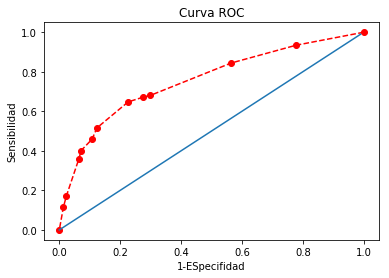

In [90]:
%matplotlib inline
plt.plot(especifities_1,sensitivities, marker = 'o', linestyle="--", color="r")
x= [i*0.01 for i in range(100)]
y= [i*0.01 for i in range(100)]
plt.plot(x,y)
plt.xlabel("1-ESpecifidad")
plt.ylabel("Sensibilidad")
plt.title("Curva ROC")

In [99]:
from sklearn import metrics
#from ggplot import *

ModuleNotFoundError: No module named 'ggplot'

In [94]:
espc_1, sensit,_ = metrics.roc_curve(Y_test, prob)

In [95]:
df = pd.DataFrame({
    "x":espc_1,
    "y":sensit
})

In [96]:
df.head()

,x,y
0,0.000000,0.008197
1,0.000000,0.024590
2,0.000000,0.032787
3,0.002693,0.032787
4,0.002693,0.049180


In [98]:
auc = metrics.auc(espc_1,sensit)
auc # Area under curve Area bajo la curva roc entre mas cercana a 1 mejor sera el modelo

0.7575712982311564